In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,roc_curve,confusion_matrix,classification_report,multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
df1 = pd.read_csv('FaultyDataset.csv', names = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4'])
df2 = pd.read_csv('HealthyDataset.csv', names = ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4'])

df1.head(), df2.head()

(   Sensor1  Sensor2  Sensor3  Sensor4
 0    -3.93     6.55   -1.240    20.30
 1     2.40     9.99   -3.240     8.31
 2     6.24    -3.18   -0.687    -4.19
 3    -3.99   -14.10    3.850    -5.66
 4     1.77    -6.46    5.100    -9.00,
    Sensor1  Sensor2  Sensor3  Sensor4
 0   -19.00   -0.250   -0.188   1.0600
 1    -9.94    8.530    7.550   4.7000
 2    21.40   -4.740   -0.278   5.9500
 3     8.52   -0.593    1.260   3.6400
 4   -21.10   -0.558    8.980   0.0193)

In [3]:
df1.describe(), df2.describe()

(            Sensor1       Sensor2       Sensor3       Sensor4
 count  94208.000000  94208.000000  94208.000000  94208.000000
 mean      -0.009915      0.002396     -0.014725      0.005150
 std        4.757352      4.355543      3.910184      4.596443
 min      -24.300000    -28.600000    -18.600000    -27.300000
 25%       -3.040000     -2.500000     -2.190000     -2.540000
 50%       -0.131000      0.147000      0.057150      0.188000
 75%        2.870000      2.740000      2.220000      2.690000
 max       24.000000     24.500000     23.800000     27.600000,
             Sensor1       Sensor2       Sensor3       Sensor4
 count  99840.000000  99840.000000  99840.000000  99840.000000
 mean       0.006417     -0.004324      0.015985      0.009514
 std        8.101257      4.610642      4.490550      5.153772
 min      -50.800000    -28.500000    -27.000000    -31.300000
 25%       -4.620000     -2.630000     -2.560000     -2.870000
 50%       -0.254000      0.093900      0.085200      

In [4]:
df1.info(), df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94208 entries, 0 to 94207
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sensor1  94208 non-null  float64
 1   Sensor2  94208 non-null  float64
 2   Sensor3  94208 non-null  float64
 3   Sensor4  94208 non-null  float64
dtypes: float64(4)
memory usage: 2.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99840 entries, 0 to 99839
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sensor1  99840 non-null  float64
 1   Sensor2  99840 non-null  float64
 2   Sensor3  99840 non-null  float64
 3   Sensor4  99840 non-null  float64
dtypes: float64(4)
memory usage: 3.0 MB


(None, None)

#### The Data contains non null values and all values are numerical. We are good to go with the analysis part.

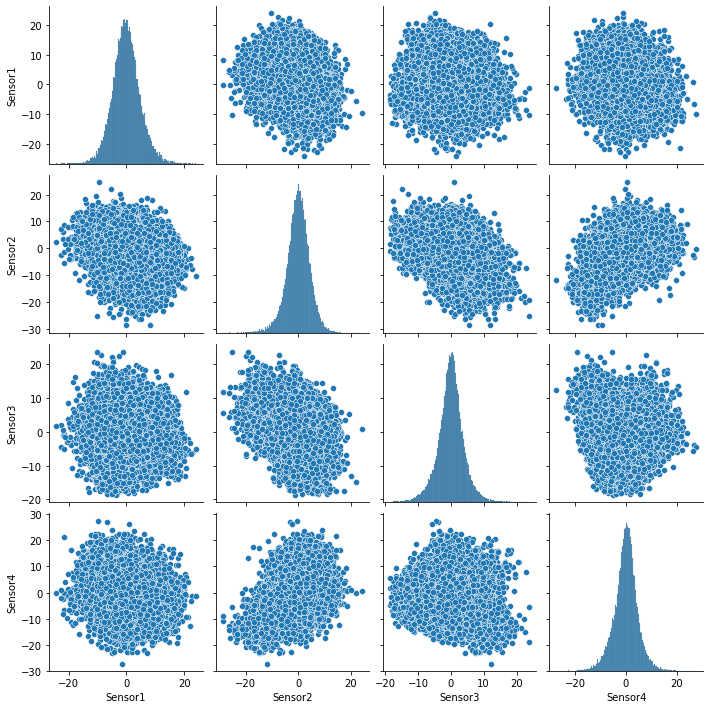

In [5]:
sns.pairplot(df1, kind ='scatter')

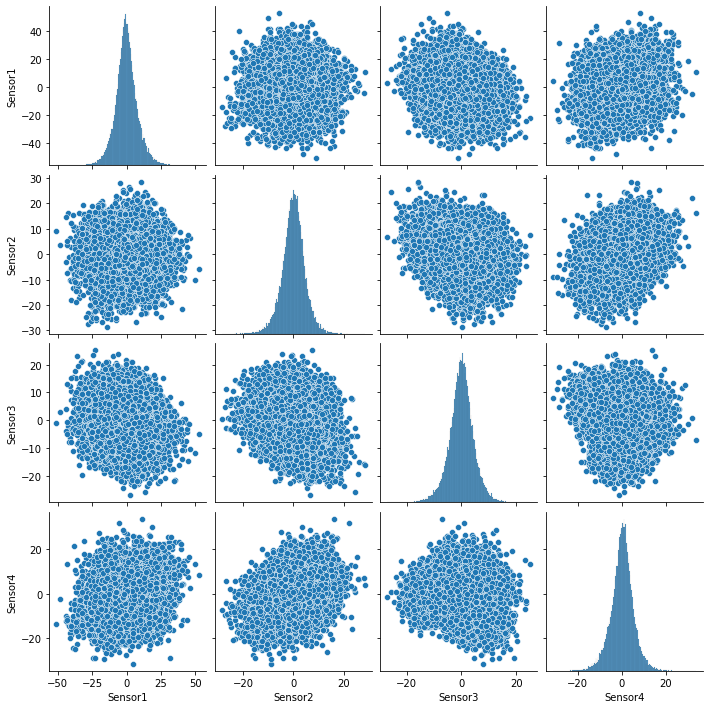

In [6]:
sns.pairplot(df2, kind ='scatter')

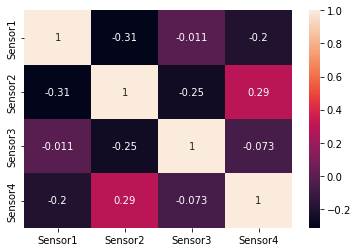

In [7]:
correlation1 = df1.corr()
plt.figure()
sns.heatmap(correlation1, annot=True)
plt.show()

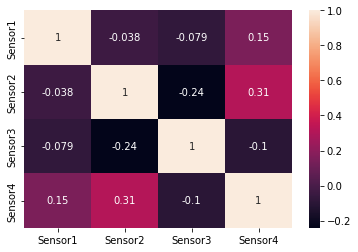

In [8]:
correlation2 = df2.corr()
plt.figure()
sns.heatmap(correlation2, annot=True)
plt.show()

In [9]:
correlation1 = df1.corr()
correlation2 = df2.corr()

correlation1, correlation2

(          Sensor1   Sensor2   Sensor3   Sensor4
 Sensor1  1.000000 -0.314104 -0.011016 -0.197975
 Sensor2 -0.314104  1.000000 -0.254380  0.289160
 Sensor3 -0.011016 -0.254380  1.000000 -0.072555
 Sensor4 -0.197975  0.289160 -0.072555  1.000000,
           Sensor1   Sensor2   Sensor3   Sensor4
 Sensor1  1.000000 -0.038246 -0.078913  0.150780
 Sensor2 -0.038246  1.000000 -0.240925  0.309077
 Sensor3 -0.078913 -0.240925  1.000000 -0.102090
 Sensor4  0.150780  0.309077 -0.102090  1.000000)

#### The data does'n have a good correlation with each other.

<AxesSubplot:>

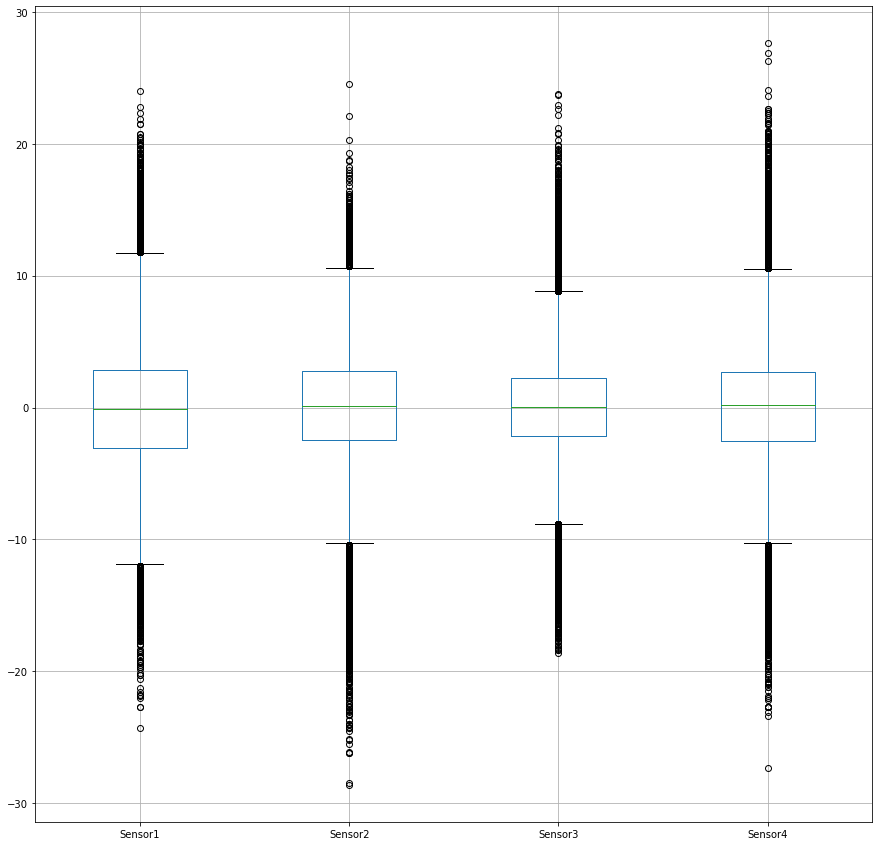

In [10]:
plt.figure(figsize=(15,15))
df1.boxplot()

<AxesSubplot:>

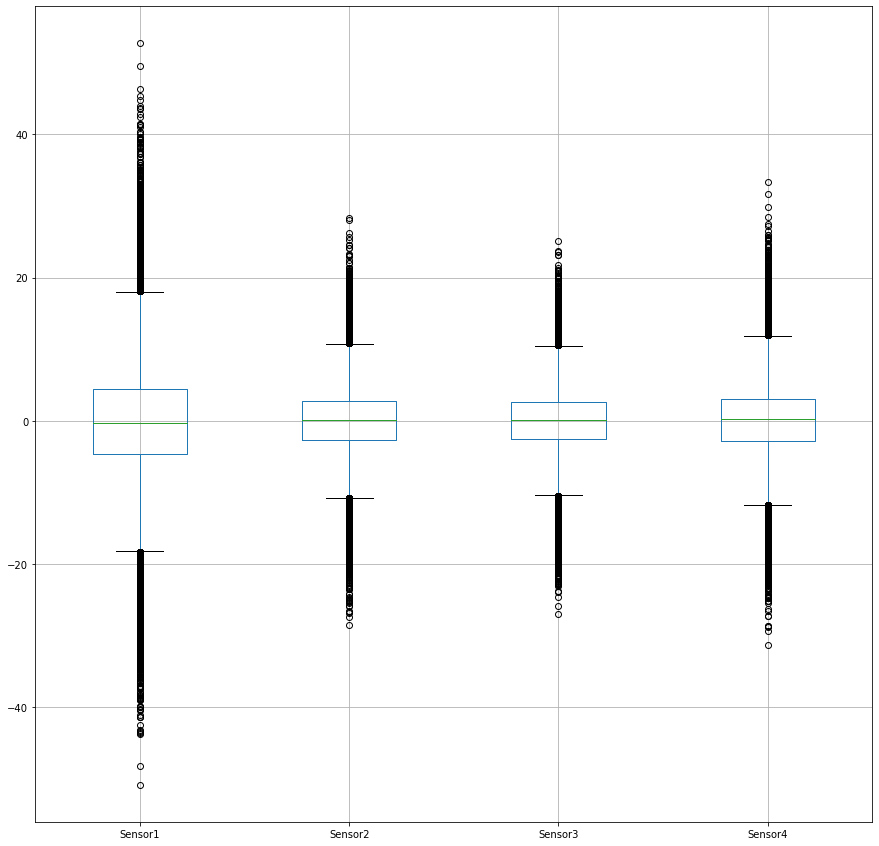

In [11]:
plt.figure(figsize=(15,15))
df2.boxplot()

In [12]:
df1['Output'] = 0
df1.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Output
0,-3.93,6.55,-1.240,20.30,0
1,2.40,9.99,-3.240,8.31,0
2,6.24,-3.18,-0.687,-4.19,0
3,-3.99,-14.10,3.850,-5.66,0
4,1.77,-6.46,5.100,-9.00,0


In [13]:
df2['Output'] = 1
df2.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Output
0,-19.00,-0.250,-0.188,1.0600,1
1,-9.94,8.530,7.550,4.7000,1
2,21.40,-4.740,-0.278,5.9500,1
3,8.52,-0.593,1.260,3.6400,1
4,-21.10,-0.558,8.980,0.0193,1


In [14]:
df = pd.concat([df1,df2], axis=0,)
df.isna().sum()

Sensor1    0
Sensor2    0
Sensor3    0
Sensor4    0
Output     0
dtype: int64

In [15]:
df

,Sensor1,Sensor2,Sensor3,Sensor4,Output
0,-3.930,6.550,-1.240,20.3000,0
1,2.400,9.990,-3.240,8.3100,0
2,6.240,-3.180,-0.687,-4.1900,0
3,-3.990,-14.100,3.850,-5.6600,0
4,1.770,-6.460,5.100,-9.0000,0
...,...,...,...,...,...
99835,-7.610,-0.149,1.200,0.7800,1
99836,-0.584,1.620,-1.850,4.4500,1
99837,1.190,2.870,-1.310,8.0100,1
99838,-0.940,-1.160,1.560,6.0000,1


Sensor1
0.12178423703454917


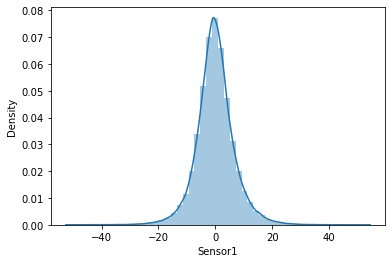

Sensor2
-0.26162667222802843


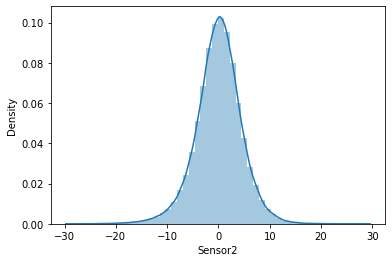

Sensor3
-0.1048750878037955


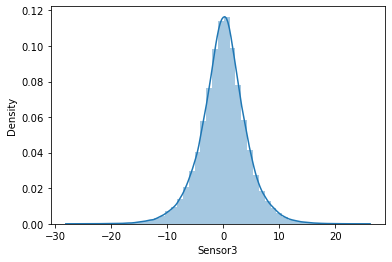

Sensor4
-0.16055427037811484


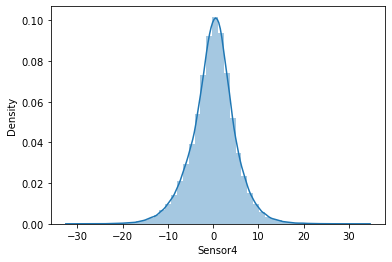

Output
-0.05807195782299578


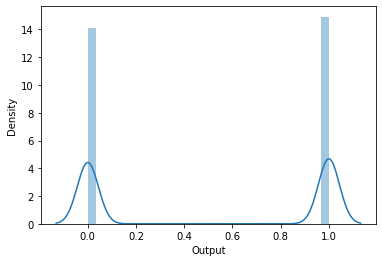

In [16]:
for i in df:
    print(i)
    print(skew(df[i]))

    plt.figure()
    sns.distplot(df[i])
    plt.show()

#### The Data is balanced

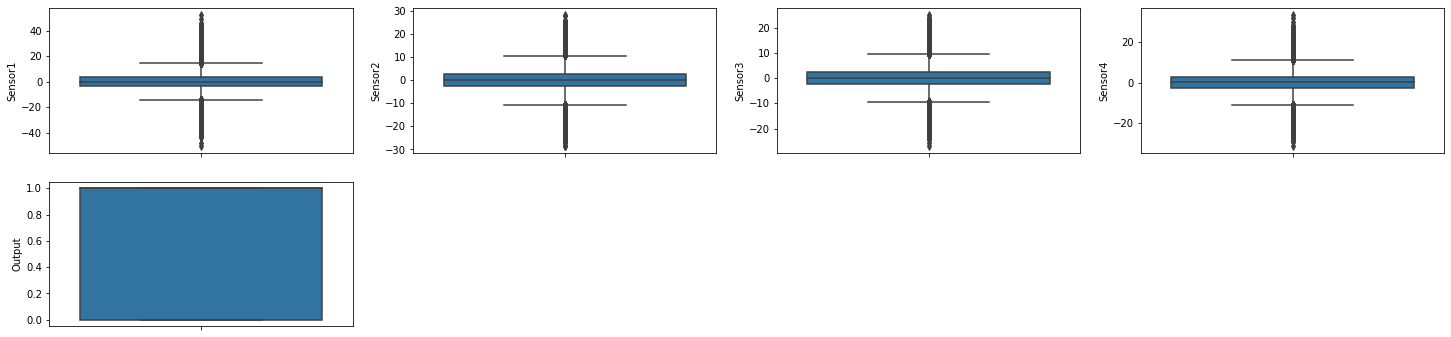

In [17]:
i = 1
plt.figure(figsize= (25, 25))
for features in df.columns:
    plt.subplot(8,4,i)
    sns.boxplot(y=df[features])
    i+=1

#### No corresponding outliers

#### Cheaking the waveform

In [18]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,94198,94199,94200,94201,94202,94203,94204,94205,94206,94207
Sensor1,-3.93,2.40,6.240,-3.99,1.77,8.040,-4.02,4.91,9.880,-4.46,...,0.416,-1.430,3.7800,-1.21,-7.60,-1.46,-3.880,1.730,8.98,6.16
Sensor2,6.55,9.99,-3.180,-14.10,-6.46,0.963,1.08,-4.48,1.060,5.19,...,3.280,0.855,0.4750,-5.51,-1.55,2.78,0.854,4.070,10.10,5.58
Sensor3,-1.24,-3.24,-0.687,3.85,5.10,-1.540,7.17,4.66,-6.260,-13.30,...,-2.520,-1.640,-5.5400,-3.78,1.26,-1.15,6.420,5.360,1.55,2.41
Sensor4,20.30,8.31,-4.190,-5.66,-9.00,2.540,5.76,1.99,0.919,-2.55,...,5.440,3.580,0.0182,2.23,-3.68,-4.54,-5.470,0.216,3.66,2.04
Output,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,...,0.000,0.000,0.0000,0.00,0.00,0.00,0.000,0.000,0.00,0.00


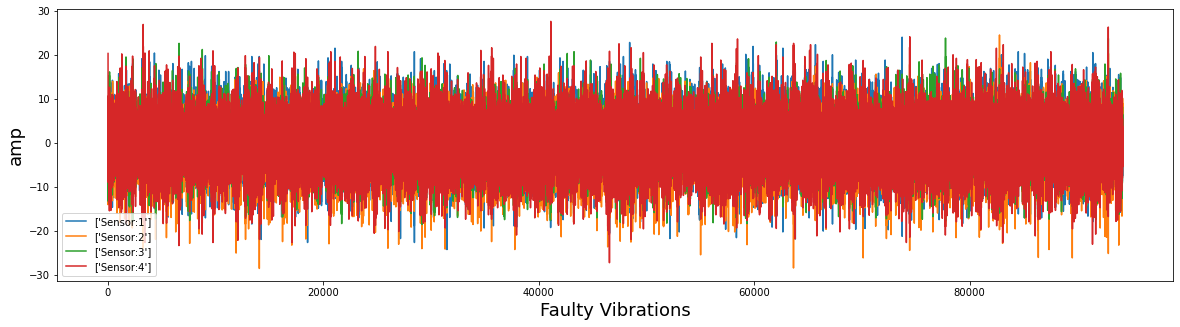

In [19]:
fig, (ax1) = plt.subplots(1, figsize=(20, 5), sharey=True)
for i in range(4):
    sns.lineplot(x=df1.T.columns, y=df1.T.iloc[i, :], ax=ax1, label=[f"Sensor:{i+1}"])
ax1.set_xlabel("Faulty Vibrations", fontsize=18)
ax1.set_ylabel("amp", fontsize=18)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(0.2)

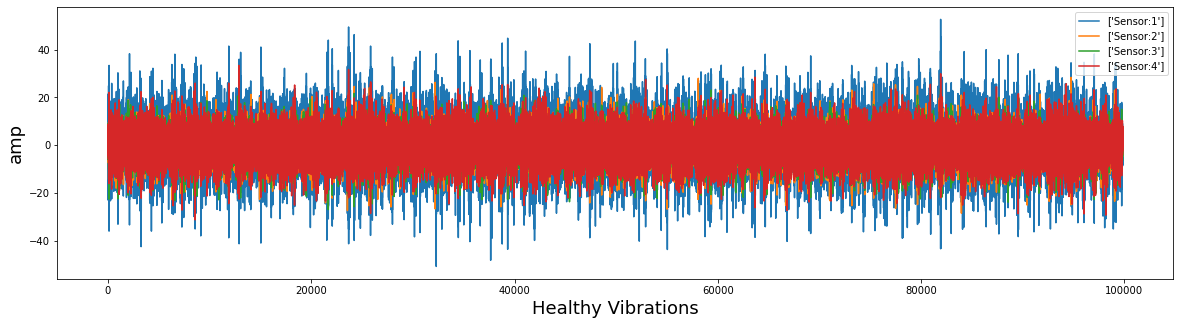

In [20]:
fig, (ax1) = plt.subplots(1, figsize=(20, 5), sharey=True)
for i in range(4):
    sns.lineplot(x=df2.T.columns, y=df2.T.iloc[i, :], ax=ax1, label=[f"Sensor:{i+1}"])
ax1.set_xlabel("Healthy Vibrations", fontsize=18)
ax1.set_ylabel("amp", fontsize=18)
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(0.2)

### Splitting the Data

In [21]:
features = df.drop('Output', axis = 1)
target = df['Output']

In [22]:
import imblearn
from imblearn.over_sampling import SMOTE

# over = SMOTE(sampling_strategy=0.1)
oversample = SMOTE()
x_smot, y_smot = oversample.fit_resample(features, target)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_smot,y_smot,test_size=0.2,random_state=42)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((159744, 4), (39936, 4), (159744,), (39936,))

### Logistic Regression

In [25]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [26]:
logReg_ypred = log_reg.predict(x_test)
logReg_ypred[:1000]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [27]:
y_test

56528     0
69027     0
29208     0
44287     0
65519     0
         ..
9144      0
154358    1
96736     1
160394    1
113637    1
Name: Output, Length: 39936, dtype: int64

#### Evaluating the model

#### Confusion Matrix

In [28]:
logReg_conMatrix = confusion_matrix(y_test, logReg_ypred)
logReg_conMatrix

array([[12315,  7548],
       [12121,  7952]], dtype=int64)

In [29]:
precision_score(y_test, logReg_ypred)

0.5130322580645161

In [30]:
recall_score(y_test, logReg_ypred)

0.39615403776216807

In [31]:
accuracy_score(y_test, logReg_ypred)

0.5074869791666666

In [32]:
print(classification_report(y_test, logReg_ypred))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56     19863
           1       0.51      0.40      0.45     20073

    accuracy                           0.51     39936
   macro avg       0.51      0.51      0.50     39936
weighted avg       0.51      0.51      0.50     39936



In [33]:
logReg_ypredProb = log_reg.predict_proba(x_test)
logReg_ypredProb

array([[0.5065231 , 0.4934769 ],
       [0.4958036 , 0.5041964 ],
       [0.49709346, 0.50290654],
       ...,
       [0.50042187, 0.49957813],
       [0.49944495, 0.50055505],
       [0.50650491, 0.49349509]])

In [34]:
roc_auc = roc_auc_score(y_test, logReg_ypred)
roc_auc

0.5080755085352149

In [35]:
fpr, tpr, thresold = roc_curve(y_test, logReg_ypred)
print(fpr,tpr,thresold,sep='\n')

[0.         0.38000302 1.        ]
[0.         0.39615404 1.        ]
[2 1 0]


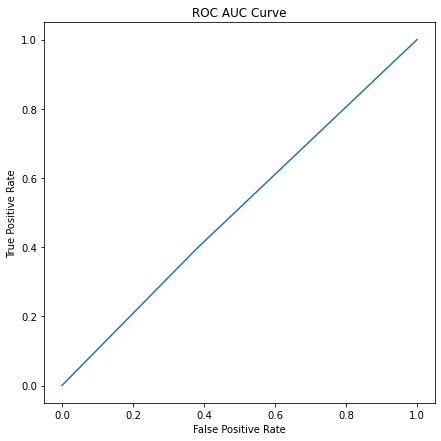

In [36]:
plt.figure(figsize=(7, 7))
plt.title('ROC AUC Curve')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### KNN Classifier

In [37]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
knn_ypred = knn_classifier.predict(x_test)
knn_ypred[:1000]

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [39]:
accuracy_score(y_test,knn_ypred)

0.5982321714743589

In [40]:
precision_score(y_test,knn_ypred)

0.6073446327683616

In [41]:
recall_score(y_test,knn_ypred)

0.5676779753898271

In [42]:
print(classification_report(y_test,knn_ypred))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61     19863
           1       0.61      0.57      0.59     20073

    accuracy                           0.60     39936
   macro avg       0.60      0.60      0.60     39936
weighted avg       0.60      0.60      0.60     39936



In [43]:
kconf_mat = confusion_matrix(y_test,knn_ypred)
kconf_mat

array([[12496,  7367],
       [ 8678, 11395]], dtype=int64)

In [44]:
kroc_auc = roc_auc_score(y_test,knn_ypred)
kroc_auc

0.5983936873878098

In [45]:
kfpr,ktpr,kthresold= roc_curve(y_test,knn_ypred)
print(kfpr,ktpr,kthresold,sep='\n')

[0.        0.3708906 1.       ]
[0.         0.56767798 1.        ]
[2 1 0]


Text(0, 0.5, 'True Positive Rate')

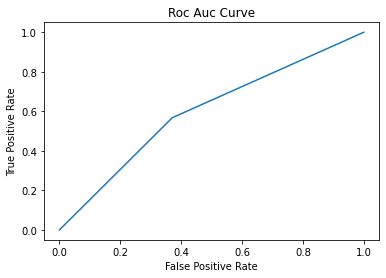

In [46]:
plt.title('Roc Auc Curve')
plt.plot(kfpr,ktpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Decision Tree

In [47]:
decTree_model = DecisionTreeClassifier()
decTree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
decTree_ypred = decTree_model.predict(x_test)
decTree_ypred[:1000]

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [49]:
decTree_predTrain = decTree_model.predict(x_train)
decTree_predTrain[:1000]

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [50]:
(accuracy_score(y_test,decTree_ypred))*100

56.71324118589743

In [51]:
(accuracy_score(y_train,decTree_predTrain))*100

100.0

In [52]:
confusion_matrix(y_test,decTree_ypred)

array([[11272,  8591],
       [ 8696, 11377]], dtype=int64)

In [53]:
print(classification_report(y_test,decTree_ypred))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57     19863
           1       0.57      0.57      0.57     20073

    accuracy                           0.57     39936
   macro avg       0.57      0.57      0.57     39936
weighted avg       0.57      0.57      0.57     39936



In [54]:
DT_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
DT_model.fit(x_train,y_train)
y_pred_tuned=DT_model.predict(x_test)
accuracy_score(y_test,y_pred_tuned)

0.6206430288461539

In [55]:
y_pred_tuned_train=DT_model.predict(x_train)
accuracy_score(y_train,y_pred_tuned_train)

0.6352977263621795

#### GSCV

In [56]:
DT_model = DecisionTreeClassifier()

In [57]:
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,25),
                  'min_samples_leaf':np.arange(2,4),
                  'min_samples_split':np.arange(2,4)}
gscv_dt_model=GridSearchCV(DT_model,hyperparameters,cv=3)
gscv_dt_model

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [58]:
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [59]:
gscv_dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [60]:
y_pred_gscv=gscv_dt_model.predict(x_test)
accuracy_score(y_test,y_pred_gscv)

0.6189152644230769

In [61]:
y_pred_train_gscv=gscv_dt_model.predict(x_train)
accuracy_score(y_train,y_pred_train_gscv)

0.6303961338141025

#### RSCV

In [62]:
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,100),
                  'min_samples_leaf':np.arange(2,20),
                  'min_samples_split':np.arange(2,10)}
rscv_dt_model=RandomizedSearchCV(DT_model,hyperparameters)
rscv_dt_model

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'Gini'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [63]:
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'Gini'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [64]:
rscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=3)

In [65]:
y_pred1=rscv_dt_model.predict(x_test)
accuracy_score(y_test,y_pred1)

0.6207181490384616

#### Random Forest

In [66]:
y_train.value_counts()

0    79977
1    79767
Name: Output, dtype: int64

In [67]:
y_test.value_counts()

1    20073
0    19863
Name: Output, dtype: int64

In [68]:
Rf_clf = RandomForestClassifier()
Rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [69]:
test_score= Rf_clf.score(x_test,y_test)
train_score=Rf_clf.score(x_train,y_train)
print('test score is ',test_score,'train score is ',train_score)

test score is  0.6154346955128205 train score is  1.0


### RSCV

In [70]:
params = {'n_estimators':np.arange(10,20),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,20),
         'min_samples_leaf':np.arange(1,10),
         'min_samples_split':np.arange(2,10),
         'max_features':['auto'],
         'random_state':[10]}

Rf_model=RandomForestClassifier()

Rf_hyper_model=RandomizedSearchCV(Rf_model, param_distributions=params)

In [71]:
Rf_hyper_model.fit(x_train,y_train)
Rf_hyper_model.best_params_
Rf_hyper_model.score(x_test,y_test)

0.6291566506410257